# Exploratory Data Analysis for 'Time to sell'

### Introduction

This project is executed for the course of AI for Business, at the Amsterdam School of Applied Sciences in 2022. The purpose of the research is to to build and evaluate machine learning approaches to predict the price of a  house and the time to sale of a house. The dataset that is used to train and evaluate the models is scraped from the Dutch housing website Funda. In this notebook, the data will be explored and prepared for the machine learning models. The project is conducted and combined by Pim Doosje (500800438) and Joel Zelle (500763451).

### Importing the dataset and libraries

In [26]:
# Importing libraries
import numpy as np
import pandas as pd
from datetime import date
import datetime as date

# Importing visualisation libraries
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Some additional libraries and plotting all code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from IPython.core.display import HTML 

In [27]:
# Importing file and create a dataframe
df_original = pd.read_csv('housing_topic_modelling.csv')
# Show first 5 rows
df_original.head()

,Unnamed: 0,key_0,id,description,main_topic,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,...,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,0,4388064,4388064,"Ruimte, vrijheid, en altijd het water en de we...",Topic 10,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",...,1971-1980,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,4388064,62,2018-11-12
1,1,4388200,4388200,Verrassend ruime tussenwoning nabij het centru...,Topic 10,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,...,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30
2,2,4399344,4399344,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Topic 2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,...,2001-2010,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,4399344,70,2018-11-23
3,3,4400638,4400638,Wonen in een zeer royaal bemeten geschakelde 2...,Topic 3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,...,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,4400638,144,2018-12-14
4,4,4401765,4401765,Landgoed Junne is een eeuwenoud landgoed en li...,Topic 6,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,...,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,4401765,323,2018-12-06


In [28]:
# Create a copy to work in
df = df_original.copy()

### Taking a look at the data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211617 entries, 0 to 211616
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             211617 non-null  int64  
 1   key_0                  211617 non-null  int64  
 2   id                     211617 non-null  int64  
 3   description            211617 non-null  object 
 4   main_topic             211617 non-null  object 
 5   globalId               211617 non-null  int64  
 6   publicatieDatum        211617 non-null  object 
 7   postcode               211617 non-null  object 
 8   koopPrijs              210876 non-null  float64
 9   volledigeOmschrijving  211617 non-null  object 
 10  soortWoning            211617 non-null  object 
 11  categorieObject        211617 non-null  object 
 12  bouwjaar               211617 non-null  object 
 13  indTuin                211617 non-null  int64  
 14  perceelOppervlakte     144376 non-nu

The df.info function is used to give an overview of all independent variables, which are the columns in the data frame. Per variable, the number of null values is noted and the amount of data type. The number of null values is important because null values have a negative impact on the reliability of the model. From this table it can be concluded that:
- Energy label has 88.863 non null values
- Surface area has 144.376 non null values
- Number of bathrooms has 150.469 non null values
- Purchase price has 210.876 non null values
- The other 17 variables have no null values

We have decided to drop the energy label, surface area and number of bathrooms because these variables show a high frequency of null values. Another solution to dealing with null values is replacing these values with for example the average value of that variable. We have decided to drop the columns because there are enough other variables to create our machine learning models.

In [30]:
# Drop columns without use for this project and columns that do not have data for all columns/variables
# Columns 'aantalBadkamers' and 'energielabelKlasse' are dropped because they contain too many NaN values.
df = df.drop(['globalId', 'kantoor_naam_MD5hash', 'globalId.1', 'perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse', 'key_0', 'id', 'description', 'volledigeOmschrijving' ], 1)

# Drop rows with empty values (at the purchasing price)
df = df.dropna()

C:\Users\Joel\AppData\Local\Temp/ipykernel_14180/2554965178.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['globalId', 'kantoor_naam_MD5hash', 'globalId.1', 'perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse', 'key_0', 'id', 'description', 'volledigeOmschrijving' ], 1)


### Preparing the data for the ML model

1. Preparing and calculating the time to sell

In [31]:
# Change the data types into date, so these can be calculated with
df["publicatieDatum"] = pd.to_datetime(df["publicatieDatum"]).dt.date
df["datum_ondertekening"] = pd.to_datetime(df["datum_ondertekening"]).dt.date

# defining a new time to sell column, to calculate the difference between posting and selling date. This results in the days to sale
df['Time_to_sell'] = (df['datum_ondertekening'] - df['publicatieDatum']).dt.days

# Time to sell needs to be changed into int64
columns = ['Time_to_sell']
for col in columns:
    df[col] = df[col].astype('int64')
    
# Removing the instances where the selling date in before the posting date (this mistake is made on the Funda webpage)
df = df.drop(df[df.Time_to_sell < 1].index)

2. Grouping the type of houses together to keep a managing amount of variables when dummifying

In [32]:
def clean_soortwoning(x):
    if "vrijstaande" in x: 
        return "vrijstaande_woning"
    if "appartement" in x:
        return "appartement"
    if "portiekflat" in x:
        return "portiekflat"
    if "eengezinswoning" in x:
        return "eengezinswoning"
    if "herenhuis" in x:
        return "herenhuis"
    if "bovenwoning" in x:
        return "bovenwoning"
    if "benedenwoning" in x:
        return "benedenwoning"
    else: 
        return "other"

df["soortWoning_cleaned"] = df["soortWoning"].apply(clean_soortwoning)

3. Preparing the zipcode by removing the letters from the zip code

In [33]:
df['postcode']=df['postcode'].str[0:4]
postcode_df= df[["postcode"]]

#adding the postcode_index column
postcode_df["postcode_index"]= [x for x in range(postcode_df.shape[0])]
df["postcode_prepared"] = postcode_df["postcode_index"]
postcode_df

C:\Users\Joel\AppData\Local\Temp/ipykernel_14180/3333875193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postcode_df["postcode_index"]= [x for x in range(postcode_df.shape[0])]


,postcode,postcode_index
0,1774,0
2,1068,1
3,5628,2
4,7731,3
5,5971,4
...,...,...
211612,9791,205679
211613,6431,205680
211614,4051,205681
211615,4043,205682


4. Preparing the building year columns by only selecting the first four digits and dropping values that can not be used for analysis 

In [34]:
# Getting only the first 4 digits in building year column 
df['bouwjaar']=df['bouwjaar'].str[0:4]

In [35]:
# Drop Vo and Na values from bouwjaar
df= df.drop(df[df.bouwjaar == '<{Vo'].index)
df= df.drop(df[df.bouwjaar == '<{Na'].index)

In [36]:
# Change bouwjaar type to int64
columns = ['bouwjaar']
for col in columns:
    df[col] = df[col].astype('int64')

5. Removing the final columns that will not be used for analysis

In [37]:
# Dropping old columns that are converted
df = df.drop(['publicatieDatum', 'postcode', 'soortWoning', 'categorieObject', 'datum_ondertekening' ], 1)

C:\Users\Joel\AppData\Local\Temp/ipykernel_14180/4207438966.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['publicatieDatum', 'postcode', 'soortWoning', 'categorieObject', 'datum_ondertekening' ], 1)


In [38]:
# Showing the final result
df.head()

,Unnamed: 0,main_topic,koopPrijs,bouwjaar,indTuin,aantalKamers,oppervlakte,Time_to_sell,soortWoning_cleaned,postcode_prepared
0,0,Topic 10,139000.0,1971,1,3,62,104,vrijstaande_woning,0
2,2,Topic 2,267500.0,2001,0,3,70,113,appartement,1
3,3,Topic 3,349000.0,1973,1,5,144,132,eengezinswoning,2
4,4,Topic 6,495000.0,1900,0,8,323,123,vrijstaande_woning,3
5,5,Topic 9,162500.0,1970,1,4,68,243,eengezinswoning,4


6. Exporting the prepared dataset to a CSV file

In [39]:
# Save changes to a CSV format that can easily be imported in the ML notebook 
df.to_csv('prepared_df2.csv')

## Data insights

<Figure size 540x252 with 0 Axes>

<AxesSubplot:>

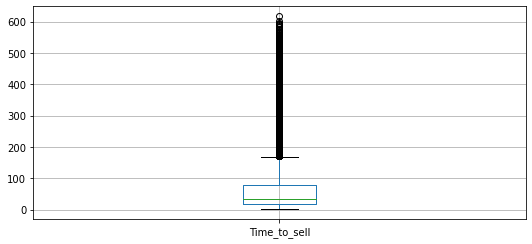

In [40]:
# Boxplot of time to sell variable
plt.figure()

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df.boxplot(['Time_to_sell'])

The boxplot gives an overview of the time to sell variable in this dataset. This highlights the smallest and highest number which is between 0 and approximately 175 days. The 25th and 75th percentile are around 25 and 75 days respectively. The black bar above the graph should represent circles that show outliers, however because of the number of outliers in this dataset it can be concluded that the dataset contains a lot of outliers. These outliers will be kept within this dataset for further analysis. 

<function matplotlib.pyplot.show(close=None, block=None)>

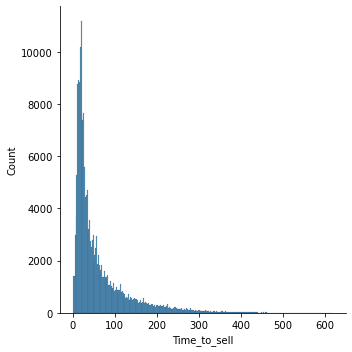

In [45]:
# Distribution of the number of days between posting and sale
a_plot = sns.displot(df['Time_to_sell'])
plt.show

<Figure size 720x720 with 0 Axes>

heatmap with correlations of dataframe
AxesSubplot(0.0398698,0.0398698;0.756104x0.939575)


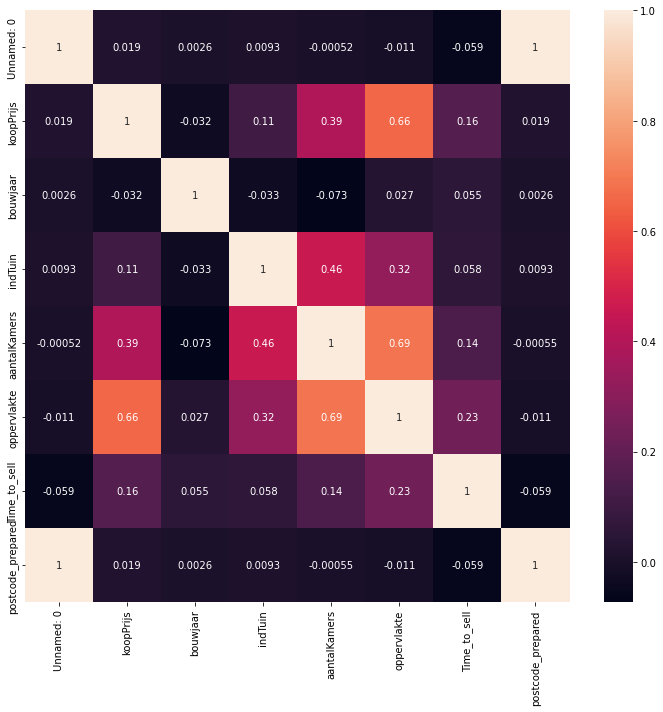

In [42]:
# Check dataset on correlations through a heatmap
plt.figure(figsize = (10, 10))       
print('heatmap with correlations of dataframe')
print(sns.heatmap(df.corr(),annot = True))